Atalov S.

---
# Дерево решений

### Как с помощью линейных моделей разделить точки на 2 класса?

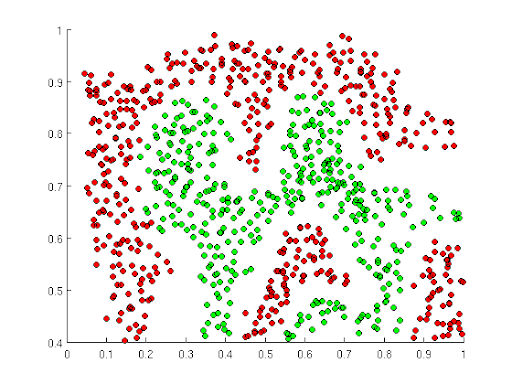

Рассмотрим простой пример классификации на примере Ирисок.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('iris.csv', sep = ',')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris = df.copy()

In [6]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris['Species'] = iris['Species'].map({'Iris-setosa': 0,
                                      'Iris-versicolor': 1,
                                      'Iris-virginica': 2})

In [ ]:
if x1 < 2 and x2 < 1:
    print('I')
else:
    if x1 < 5.5 and x2 < 1.75:
        print('II')
    else:
        print('III')

На графике каждая точка это один цветок и по оси Х - длина лепестка, по оси Y - ширина лепестка.

Как через условия (if-else) сделать правило для разделения цветков?

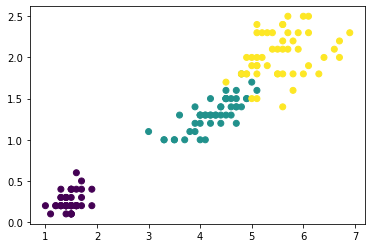

In [8]:
plt.scatter(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], c = iris['Species']);

Попробуем построить дерево:

In [9]:
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
model.score(X_train, y_train)

1.0

In [22]:
model.score(X_test, y_test)

0.9333333333333333

In [ ]:
plot_tree(model);

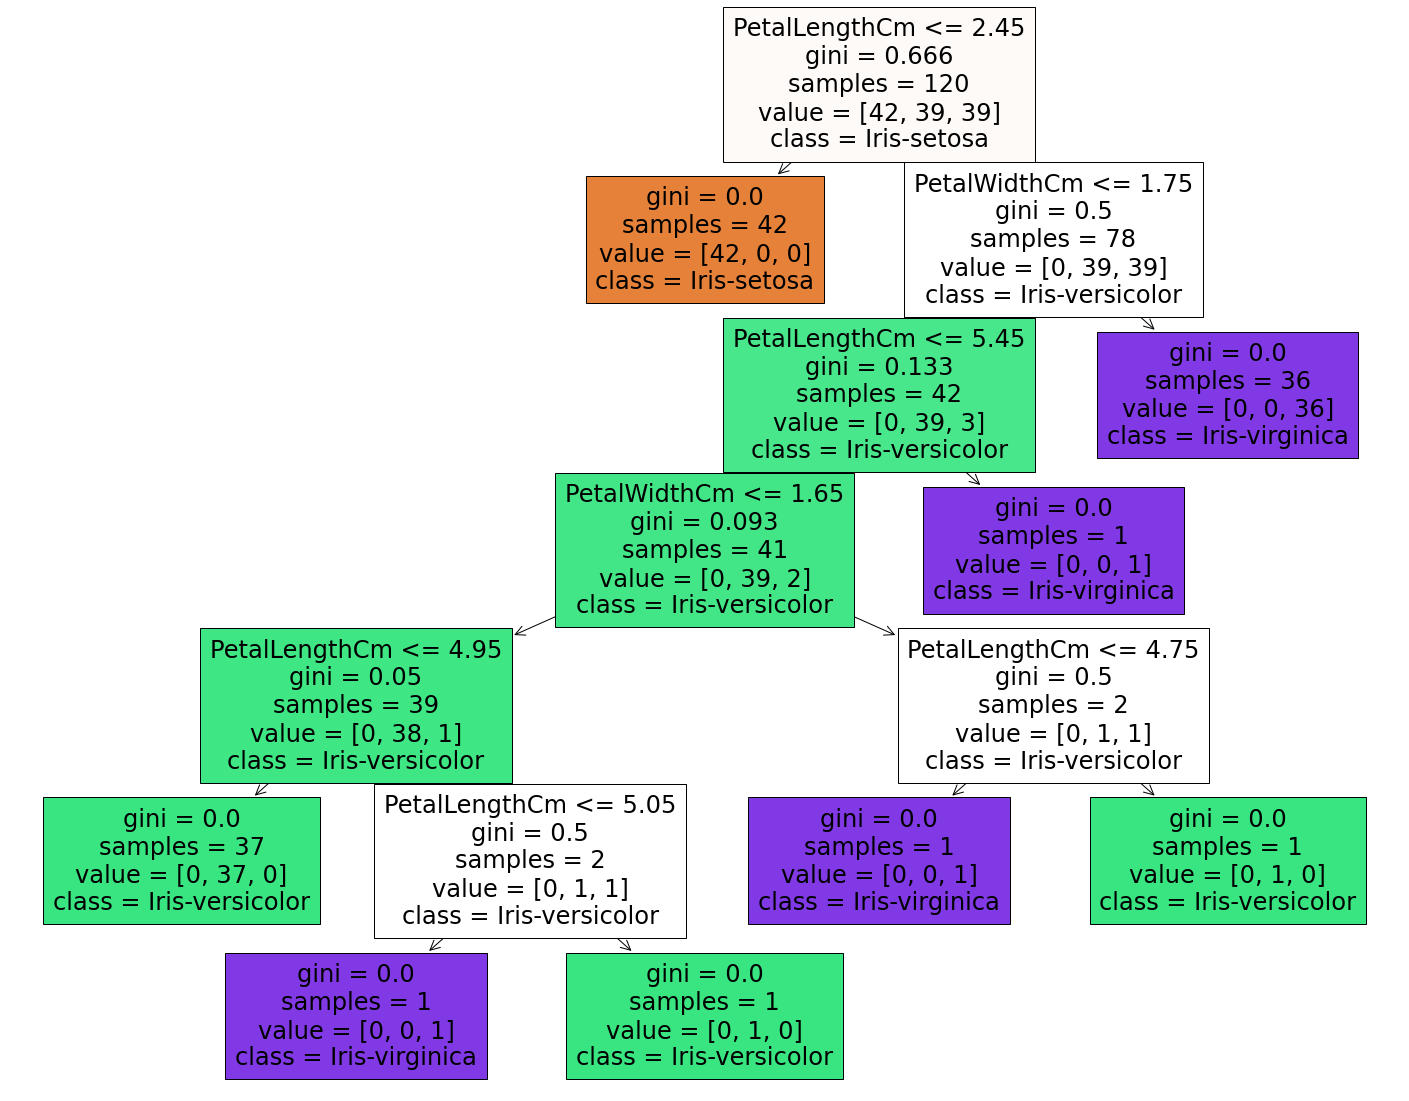

In [23]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names=['PetalLengthCm', 'PetalWidthCm'],
              class_names=df['Species'].unique(), filled=True)

## Энтропия?

<div>
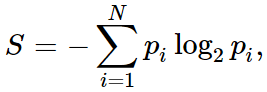
</div>

где $p_i$ это вероятность нахождения элемента в выборке.

Энтропия - это очень важное понятие, используемое в физике, теории информации и других областях. Энтропию можно описать как степень хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот.

In [41]:
df = pd.DataFrame({'X1': [1,1,1,0,0,0,0,1],
                   'X2': [0,0,0,1,0,0,0,1],
                   'Y': [1,1,1,1,0,0,0,0]})
df

,X1,X2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [50]:
X = df[['X1', 'X2']]
y = df['Y']

In [43]:
## Построить дерево и показать график

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [46]:
model1 = DecisionTreeClassifier(criterion = 'entropy')

In [51]:
model1.fit(X, y)

DecisionTreeClassifier()

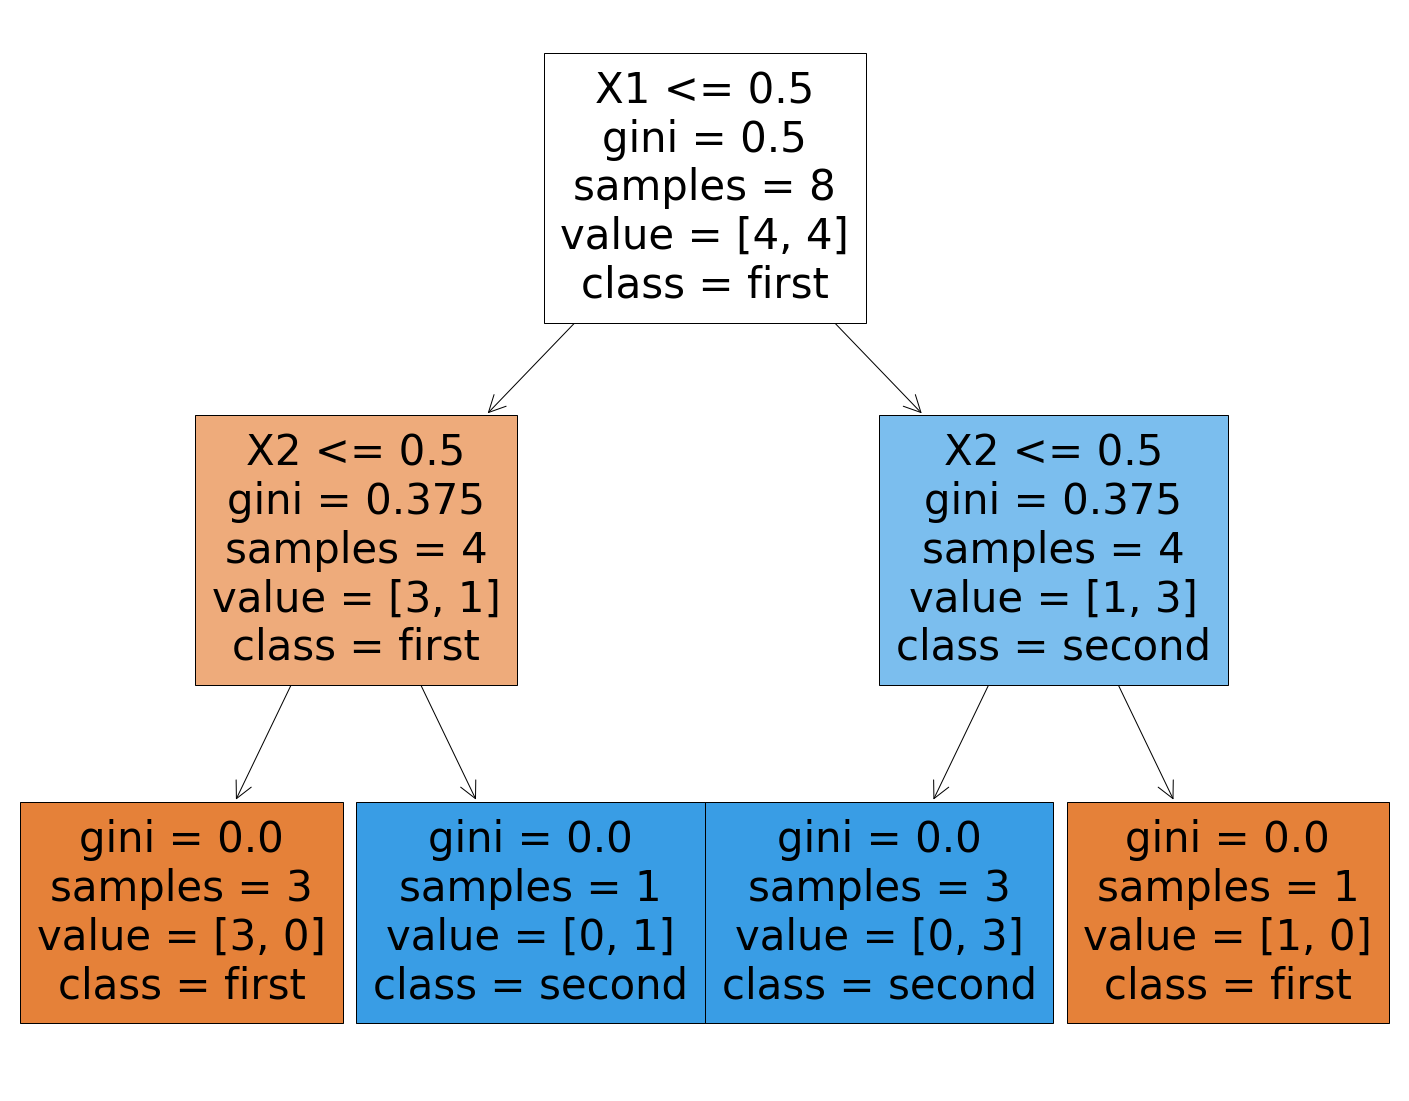

In [54]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model1, feature_names=['X1', 'X2'],
              class_names=['first', 'second'], filled=True)

[Text(167.4, 181.2, 'X[0] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

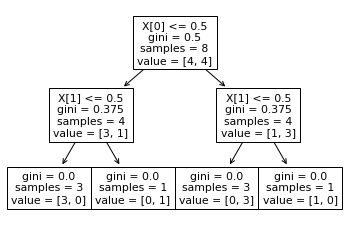

In [56]:
plot_tree(model1)

In [ ]:
## Загрузить данные 'telecom_churn.xlsx' и попробовать построить дерево

In [ ]:
import pandas as pd

In [57]:
df = pd.read_excel('telecom_churn.xlsx')

In [58]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [79]:
df.pop('State')

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

In [80]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [66]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [73]:
X = df.copy()
X.pop('Churn')

y = df['Churn']

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [86]:
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
model3 = DecisionTreeClassifier(max_depth = 6)
model3.score(X_train, y_train)
model3.score(X_train, y_train)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.